# Pandas Window Functions

***
## This notebook introduces Window functions in Pandas, which are the some of the primary functions that Pandas provides for analyzing time series data.

## We are not going to go in depth on analyzing time series data here, as there is a class, ISYE6402, which spends an entire semester on this topic, albeit in the `R` programming language.

## Our purpose here is to help students understand how to compute rolling metrics, such as moving average, moving/rolling sum, and other rolling statistical functions.

## There are sample exams that use this functionality, and it is a topic that would be in scope as a possible analysis methodology for future exams.
***

In [ ]:
import pandas as pd  # Standard idiom for loading pandas
import numpy as np

### Python supports a number of different windowing functions, using the functions `rolling()`, `expanding()`, and `ewm()`.

### We will work solely with the `rolling()` function in this class.

`Documentation Links:`  https://pandas.pydata.org/pandas-docs/stable/user_guide/window.html

https://pandas.pydata.org/pandas-docs/stable/reference/window.html

## Pandas rolling() function.

### The `rolling()` function in pandas computes statistics which over moving time periods.

### At its most basic, the `rolling()` function requires a dataframe with a single numeric data column, over which it will compute the statistics.

### Again at its most basic, rolling assumes that the dataframe is sorted from top to bottom in the order desired, so it computes the statistics starting with the first row and going down in the dataframe.


## Let's look at the `rolling().mean()` function.

## Mathematically, `rolling()` computes a Simple Moving Average, by the commentary and equation below.

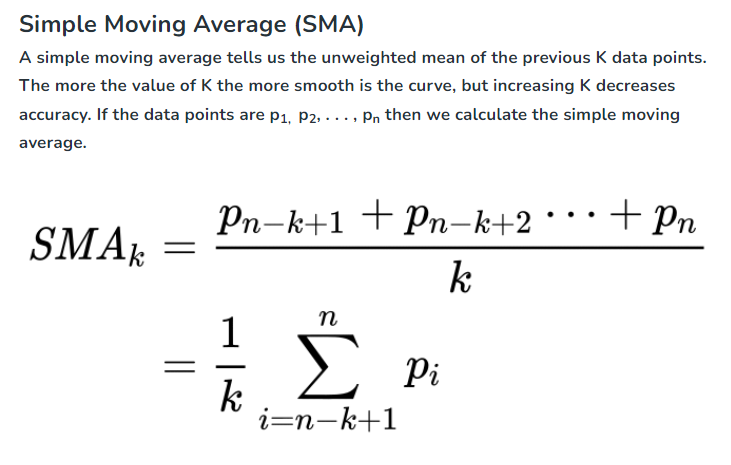

Let's look at the documentation, then work through some examples.
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

Note that the only argument that is required is the size of the window.

From the equation above, `n` is the number of observations in the entire data set, and `k` is the window size. `p` is the value of each observation.

#### So let's look at an example.

`The data set is the monthly average temperature for Los Angeles from the time period 1950 through 2018.`

In [ ]:
# load the data file
# bring in the sample output file    
LA_temps = pd.read_csv('LA Temp Monthly.csv')
LA_temps_copy = LA_temps.copy()  # for use later

In [ ]:
display(LA_temps.head(5))
display(LA_temps.info())
display(LA_temps.describe())

#### A basic example. Calculate a 3-month rolling average.

In [ ]:
# 3 month rolling average of the dataframe
LA_temps.rolling(3).mean()

#### What happened here?

`The rolling() function calculated the rolling average of both the` **Date** `and` **Temp** `columns.`

#### Why?

`Recall from above that both columns are numeric, so rolling can operate on each one.`

#### So how do we fix it?

`We use the` **on** `parameter, to designate the column that rolling will group the windowed data by. It functions similarly to` **groupby()** `that we have discussed earlier in the Bootcamp.`

In [ ]:
LA_temps.rolling(3,on='Date').mean()

#### We can see that `rolling()` returns a dataframe object.

#### What if we want to add the rolling average as a column to our base dataframe?

`Use the pandas syntax to create a new column, and designate the column that the rolling function is to be computed on.`

In [ ]:
LA_temps['3_month_avg'] = LA_temps.rolling(3,on='Date').mean()['Temp']

In [ ]:
LA_temps

#### We can see that the first two rows don't have a number in the `3_month_avg` column. Why?

#### We have not set the parameter `min_periods`.

#### From the documentation:

#### min_periods:  int, default None

Minimum number of observations in window required to have a value; otherwise, result is np.nan.

For a window that is specified by an offset, min_periods will default to 1.

`For a window that is specified by an integer, min_periods will default to the size of the window.`

#### This latter scenario is what we have. Our periods are set to `3`, so the first two are empty.

Let's say that we only need 2 periods to start our rolling average with.

In [ ]:
LA_temps['3_month_avg_2'] = LA_temps.rolling(3,on='Date',min_periods = 2).mean()['Temp']

In [ ]:
LA_temps

## So let's do a simple analysis. Is Los Angeles getting hotter over time?

### How do the monthly temperature metrics compare over time, for Los Angeles?

#### Compute the 5-year annual rolling average, median, min, and max monthly temperatures for Los Angeles, for comparison.

#### Use the LA_temps_copy dataframe as the starting point.

Create a dataframe, LA_temps_annual, with the following columns in order from left to right:

1. Year -- 4 character string, representing the year

2. '12_month_avg' -- Rolling 12 month average monthly average temperature, for that year

3. '12_month_median' -- Rolling 12 month median monthly average temperature, for that year

4. '12_month_min' -- Rolling 12 month minimum monthly average temperature, for that year

5. '12_month_max' -- Rolling 12 month maximum monthly average temperature, for that year

6. '5_year_average' -- Rolling 5 year average temperature, of the annual average temperatures computed for the '12_month_average' column.

#### So our question is:  How do we compute these annual rolling statistics?

With this data set, logically, to compute the annual average (for example), we would take the 12 individual monthly averages for each year and find their average.

So in using the `rolling()` function, we want the computed value for each December observation (month 12), which will give us the rolling statistic for that year.

#### What is our strategy for completing this requirement?

1. Create the new dataframe as a copy of the original.

2. Compute the rolling statistics for each month, creating the new columns for each.

3. Create the `Year` column as a string copy of the `Date` colummn.

4. Filter the rows to only include the December observations (Boolean mask for month 12).

5. Remove the '12' in each `Year`, so that we only have the 4-digit year.

6. Reset the index.

7. Compute the 5 year average column.

In [ ]:
LA_temps_annual = LA_temps_copy.copy()

In [ ]:
# compute the statistics
LA_temps_annual['12_month_avg'] = LA_temps_copy.rolling(12,on='Date').mean()['Temp']

LA_temps_annual['12_month_median'] = LA_temps_copy.rolling(12,on='Date').median()['Temp']

LA_temps_annual['12_month_min'] = LA_temps_copy.rolling(12,on='Date').min()['Temp']

LA_temps_annual['12_month_max'] = LA_temps_copy.rolling(12,on='Date').max()['Temp']

LA_temps_annual.head(12)

In [ ]:
# Create the Year column
LA_temps_annual['Year'] = LA_temps_annual['Date'].astype('string')

LA_temps_annual.head(5)

In [ ]:
# Filter for only the December observations
# Create the boolean mask
december_mask = LA_temps_annual['Year'].str.contains('12')
LA_temps_annual = LA_temps_annual[december_mask]
LA_temps_annual

In [ ]:
# remove the '12' from the Year column
LA_temps_annual['Year'] = LA_temps_annual['Year'].str[0:4]
LA_temps_annual

In [ ]:
# keep only the columns we want, in the order
LA_temps_annual = LA_temps_annual[['Year','12_month_avg','12_month_median','12_month_min','12_month_max']].reset_index()
display(LA_temps_annual.head(5))
# remove the index column
LA_temps_annual = LA_temps_annual[['Year','12_month_avg','12_month_median','12_month_min','12_month_max']]
LA_temps_annual

In [ ]:
# 5 year rolling average of the dataframe
LA_temps_annual['5_year_avg'] = LA_temps_annual.rolling(5,on='Year').mean()['12_month_avg']
LA_temps_annual

### Plot the statistics to view the trends.

In [ ]:
import matplotlib.pyplot as plt
LA_temps_annual.plot(x="Year", y=["5_year_avg","12_month_avg"])
plt.show()

In [ ]:
LA_temps_annual.plot(x="Year", y=["12_month_median","12_month_min","12_month_max"])
plt.show()